### Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12
rcParams.update({'font.size': 16})

#### Load Dataset

In [33]:
df = pd.read_csv("assignment_rev2.csv")
df.head(10)

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43018583,134.7,15502.0,northern sub,642,550000,1992,ground-floor,detached,5,...,False,True,False,True,True,False,False,True,False,True
2,39670968,71.0,9807.0,northern sub,320,500000,2009,ground-floor,detached,2,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,False,True,False,True,True,False,False,False,False,False
4,39742998,126.7,14682.0,northern sub,195,370000,2007,ground-floor,maisonette,4,...,False,True,False,True,True,False,False,False,False,True
5,39813890,133.8,14682.0,northern sub,318,560000,2011,ground-floor,detached,6,...,False,True,False,True,False,False,False,False,False,False
6,36078547,116.5,8906.0,northern sub,291,970000,2010,ground-floor,maisonette,3,...,False,False,False,True,True,False,False,False,False,True
7,43027442,142.0,14007.0,northern sub,350,550000,1993,NaN,detached,5,...,False,True,False,True,True,False,True,True,False,False
8,36152206,154.5,8123.0,northern sub,400,850000,2008,ground-floor,detached,6,...,False,True,False,True,True,True,True,True,True,True
9,43045884,27.8,11545.0,northern sub,583,220000,2155,ground-floor,detached,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.shape

(15447, 56)

In [35]:
df.describe()

,id,ranking_score,agent_id,sq_meters,price,year_of_construction,rooms,no_of_bathrooms,renovation_year,no_of_wc,living_rooms,kitchens,balcony_area,equipped
count,1.544700e+04,15447.000000,15343.000000,15447.000000,1.544700e+04,15447.000000,15447.000000,15447.000000,2067.000000,15447.000000,15447.000000,15447.000000,15447.000000,0.0
mean,4.131725e+07,117.620930,11530.444633,207.793487,5.930395e+05,1950.277918,2.946009,1.700913,2011.748911,0.654561,0.559397,0.611251,5.058976,NaN
std,2.101149e+06,31.482549,3156.084925,1141.088955,7.123263e+05,307.364360,2.668520,1.324825,8.017487,0.804571,1.028194,0.712105,22.618473,NaN
min,3.464630e+07,16.000000,5976.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.046387e+07,95.500000,9237.000000,89.000000,2.350000e+05,1976.000000,2.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,4.212294e+07,122.200000,11210.000000,140.000000,4.000000e+05,1996.000000,3.000000,1.000000,2014.000000,1.000000,0.000000,1.000000,0.000000,NaN
75%,4.283962e+07,142.800000,13354.500000,250.000000,7.000000e+05,2010.000000,4.000000,2.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,NaN
max,4.346410e+07,182.800000,20017.000000,140000.000000,2.500000e+07,2155.000000,255.000000,21.000000,2019.000000,22.000000,60.000000,11.000000,400.000000,NaN


### Null Imputation 

I dropped all the features that had null rate more than 0.5. Those were: energy_class, renovation_year, equipped, accessible_for_disabled. Also, I removed the rows where the agend_id was null as we couldn't use a summary statistic to replace those values. For the rest of them I used the median value. I also had to replace the ground-floor with 0 and the basement with -1 in order to have common type in the entire column.

In [36]:
df.isna().sum()/df.shape[0]

id                         0.000000
ranking_score              0.000000
agent_id                   0.006733
geography_name             0.000000
sq_meters                  0.000000
price                      0.000000
year_of_construction       0.000000
floor                      0.047388
subtype                    0.000000
rooms                      0.000000
no_of_bathrooms            0.000000
energy_class               0.863598
renovation_year            0.866188
no_of_wc                   0.000000
ad_type                    0.000000
living_rooms               0.000000
kitchens                   0.000000
balcony_area               0.000000
lux_home                   0.274357
new_development            0.233443
garage                     0.105522
furnished                  0.269891
preserved                  0.351719
investment                 0.321357
unfinished                 0.350877
equipped                   1.000000
heating_under_floor        0.302777
renovated                  0

In [37]:
df.dropna(thresh=0.5*df.shape[0], inplace=True, axis=1)

In [38]:
df.shape

(15447, 52)

In [39]:
df = df[df['agent_id'].notna()]
df['floor'] = df.replace({'floor':{'ground-floor': 0, 'basement': -1}})
col_nuls = df.columns[df.isnull().any()].tolist()
for col in col_nuls:
    print(col)
    df[col].fillna(df[col].median(), inplace = True)

lux_home
new_development
garage
furnished
preserved
investment
unfinished
heating_under_floor
renovated
requires_renovation
airy
bright
painted
garden
ac
storage
balcony
internal_stairs
view
secure_door
penthouse
alarm
corner
holiday_home
student_home
night_power
neoclassic
double_glass
for_commercial_use
fireplace
elevator
satellite
solar_heater
attic
pool
playroom


### EDA

I removed some suspicious properties that might be just outliers or wrong records. I kept the properties with square metres between (10, 10000), for price (100, 25.000.000) and for year of construction I removed the records with 0s. I chose those ranges after checking the statistics in the dataframe description and the rest of the features of the extreme records. For example the property's characteristics of the record with the price 25.000.000 were not representative enough thus I removed it.


In [40]:
df.loc[(df['sq_meters'] >= 100000) | (df['sq_meters'] < 10)]

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
10700,35421691,147.9,5976.0,south beach,1,620000,2008,35421691,maisonette,3,...,False,True,False,True,False,True,False,False,False,False
12758,43180452,152.4,19079.0,beesy neighborhood,140000,165000,1961,43180452,apartment,3,...,False,False,False,False,True,False,False,False,False,False


In [41]:
len(df[(df['sq_meters'] < 10000) & (df['sq_meters'] != 1)])

15341

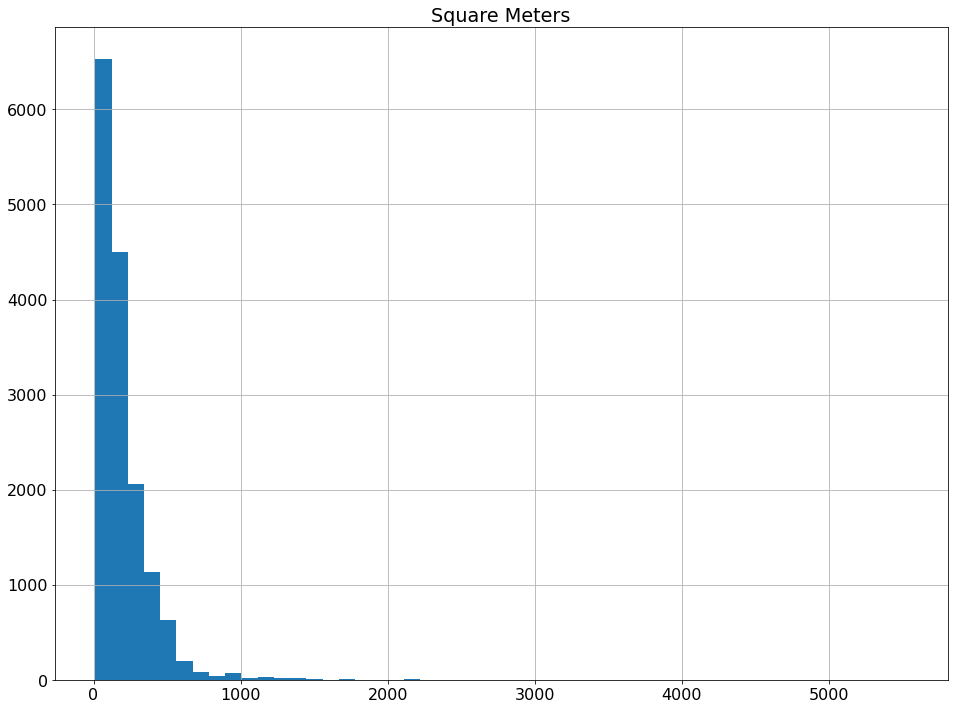

In [42]:
cleaned_df = df.loc[(df['sq_meters'] < 10000) & (df['sq_meters'] > 10)]

square_df = df.loc[(df['sq_meters'] < 1000) & (df['sq_meters'] != 1)]
plt.hist(cleaned_df['sq_meters'], bins=50)
plt.grid(True)
plt.title('Square Meters');

In [43]:
df.loc[(df['price'] > 20000000) | (df['price'] == 0)] 

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
5169,38542490,118.6,8123.0,northern sub,307,0,1980,38542490,building,1,...,False,False,True,False,False,False,False,False,False,False
7425,42344599,134.9,12423.0,northern sub,1100,25000000,1920,42344599,detached,20,...,False,False,False,False,False,False,False,False,False,False
15182,38569709,89.0,12946.0,beesy neighborhood,72,0,1968,38569709,apartment,2,...,False,False,False,False,False,False,False,False,False,False


In [44]:
cleaned_df = cleaned_df[(cleaned_df['price'] < 25000000) & (cleaned_df['price'] > 100)]

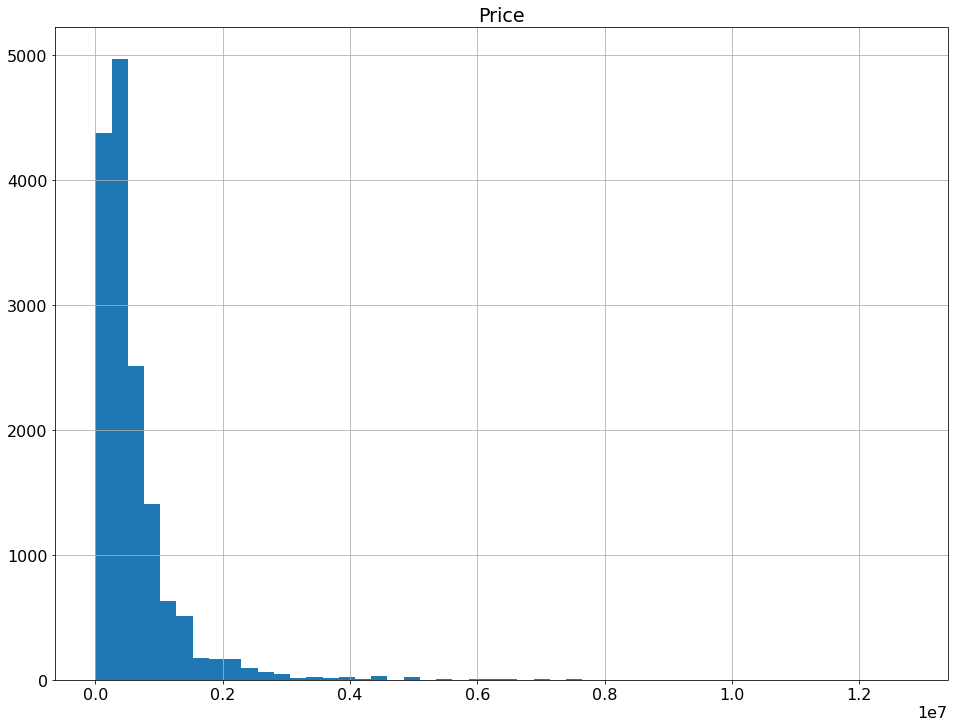

In [45]:
plt.hist(cleaned_df['price'], bins=50)
plt.grid(True)
plt.title('Price');

In [46]:
len(cleaned_df[cleaned_df['year_of_construction'] == 0])

361

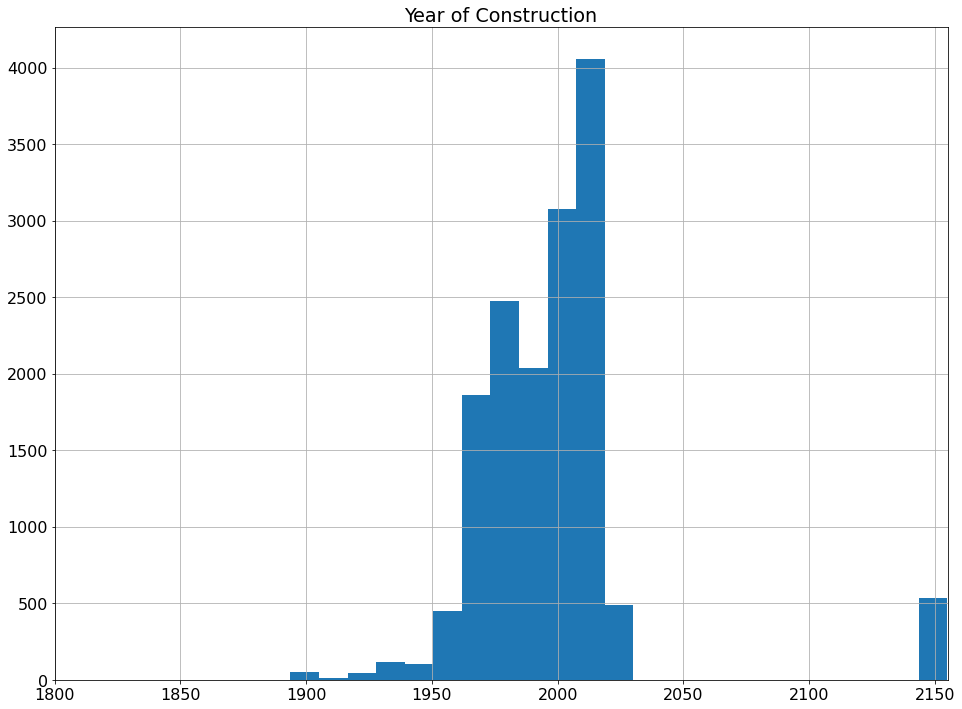

In [47]:
cleaned_df['year_of_construction'] = cleaned_df['year_of_construction'].replace(0, cleaned_df['year_of_construction'].median())
plt.hist(cleaned_df['year_of_construction'], bins=100)
plt.grid(True)
plt.xlim(1800, 2155)
plt.title('Year of Construction');

In [48]:
len(cleaned_df[cleaned_df['year_of_construction'] == 2155])

533

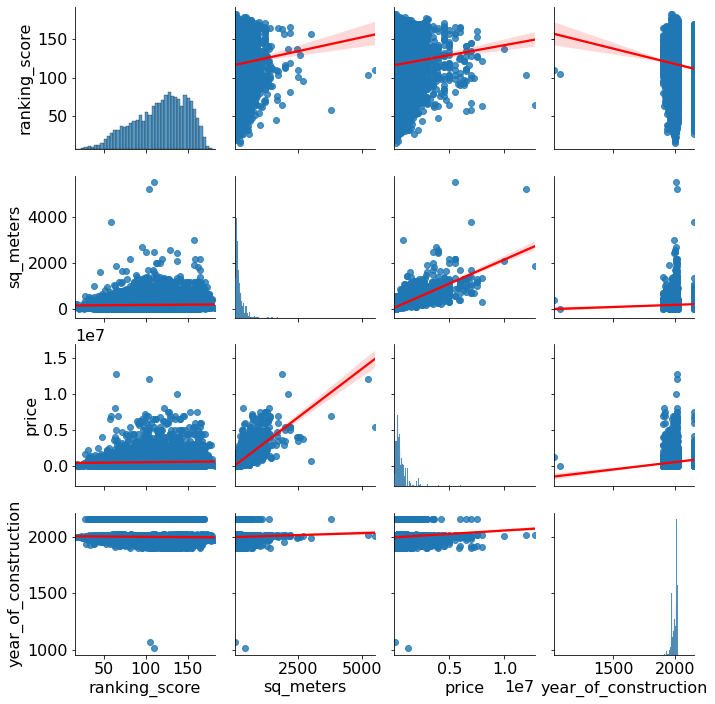

In [49]:
sns.pairplot(
    data=cleaned_df[['ranking_score', 'geography_name', 'sq_meters', 'price', 'year_of_construction']],
    kind='reg', plot_kws={'line_kws': {'color': 'red'}}
);

We can notice a linear correlation betweeen square meters and price.


In [52]:
cleaned_df.to_csv('cleaned_data.csv', index=False)